### Анализ данных и подготовка к обучению модели. 

In [84]:
import pandas as pd
import numpy as np
import datetime 
import time
from functools import reduce

 __Основные моменты  на которых стоит остановить внимание при предобработке данных:__

__data_train.csv__<br>
Column  Unnamed: 0<br>
значения не привязаны ни к чему, поэтому его можно удалить.<br>
Column  buy_time<br> 
<br>
Предварительно анализируем содержимое даты и времени используем библиотеку datetime. Убеждаемся в том, данный столбец несет информацию только о номере недели, и его преобразуем к номеру недели.<br>

 преобр значение дата/время     день        день недели 0-6         номер недели<br>
 dt_tm: 2018-07-16 01:00:00,	day: 16, 	w_day: 0-Monday,     	week: 29<br>
 dt_tm: 2018-10-15 01:00:00,	day: 15, 	w_day: 0-Monday,     	week: 42<br>
 dt_tm: 2018-12-24 01:00:00,	day: 24, 	w_day: 0-Monday,     	week: 52<br>
 dt_tm: 2018-08-13 01:00:00,	day: 13, 	w_day: 0-Monday,     	week: 33<br>
 dt_tm: 2018-08-06 01:00:00,	day: 6, 	w_day: 0-Monday,     	week: 32<br>
 dt_tm: 2018-08-13 01:00:00,	day: 13, 	w_day: 0-Monday,     	week: 33<br>
 dt_tm: 2018-12-17 01:00:00,	day: 17, 	w_day: 0-Monday,     	week: 51<br>
 dt_tm: 2018-09-24 01:00:00,	day: 24, 	w_day: 0-Monday,     	week: 39<br>
 dt_tm: 2018-12-24 01:00:00,	day: 24, 	w_day: 0-Monday,     	week: 52<br>
 dt_tm: 2018-12-10 01:00:00,	day: 10, 	w_day: 0-Monday,     	week: 50<br>
 dt_tm: 2018-09-10 01:00:00,	day: 10, 	w_day: 0-Monday,     	week: 37<br>
<br>

__data_test.csv__<br>
Выполняем преобразования как и для data_train.csv.<br>

таким образом в трейне и тесте остается 3 информативных столбца: 'id', 'vas_id', 'buy_time'<br>

определим список доступных пользователей для анализа, это id объединенный список test & train.

In [85]:
dt_train = pd.read_csv('cp_data/data_train.csv')

In [86]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831653 entries, 0 to 831652
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  831653 non-null  int64  
 1   id          831653 non-null  int64  
 2   vas_id      831653 non-null  float64
 3   buy_time    831653 non-null  int64  
 4   target      831653 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 31.7 MB


In [87]:
dt_test = pd.read_csv('cp_data/data_test.csv')
dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71231 entries, 0 to 71230
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  71231 non-null  int64  
 1   id          71231 non-null  int64  
 2   vas_id      71231 non-null  float64
 3   buy_time    71231 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 2.2 MB


In [88]:
# переводит время в номер недели
def user_timestamp_2_week(tstamp):
    return datetime.datetime.fromtimestamp(tstamp).date().isocalendar()[1]

# default Monday
def user_week_to_timestamp( week, year=2018, day=1 ): 
    u_str_dt = datetime.date.fromisocalendar(year, week, day)
    return time.mktime(datetime.datetime.strptime( str(u_str_dt), "%Y-%m-%d").timetuple())

def user_transform_train_data(dt):
    dt.columns= dt.columns.str.strip().str.lower()
    dt['week'] = dt['buy_time'].apply( user_timestamp_2_week)
    dt = dt.astype({'buy_time': 'int32','vas_id': 'int32', 'week': 'int32'})
    dt.drop(labels=['unnamed: 0'], axis=1, inplace=True)
    return dt

In [89]:
dt_target = dt_train['target'].astype(bool)
dt_target.value_counts()

False    771467
True      60186
Name: target, dtype: int64

In [90]:
dt_train.drop( ['target'], axis=1, inplace=True) 

In [91]:
dt_train = user_transform_train_data(dt_train)
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831653 entries, 0 to 831652
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   id        831653 non-null  int64
 1   vas_id    831653 non-null  int32
 2   buy_time  831653 non-null  int32
 3   week      831653 non-null  int32
dtypes: int32(3), int64(1)
memory usage: 15.9 MB


In [92]:
dt_test = user_transform_train_data(dt_test)
dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71231 entries, 0 to 71230
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   id        71231 non-null  int64
 1   vas_id    71231 non-null  int32
 2   buy_time  71231 non-null  int32
 3   week      71231 non-null  int32
dtypes: int32(3), int64(1)
memory usage: 1.4 MB


Можно посмотреть распределение по времени на тесте и трайне

In [93]:
print( f' номер недели на train:\n{np.sort(dt_train["week"].unique())}')
print( f' номер недели на test:\n{np.sort(dt_test["week"].unique())}')

 номер недели на train:
[ 1 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52]
 номер недели на test:
[2 3 4]


Вполне возможно хотят выяснить предысторию успеха!) тест по времени заложен на начало 2-я, 3-я.4-я, недели...<br>
В задании написано:<br>
Данные train и test разбиты по периодам – на train доступно 4 месяцев, а на test отложен последующий месяц... 

Посмотрим список идентификаторов услуг на тесте и трейне

In [94]:
np.sort(dt_train['vas_id'].unique()), np.sort(dt_test['vas_id'].unique())

(array([1, 2, 4, 5, 6, 7, 8, 9], dtype=int32),
 array([1, 2, 4, 5, 6, 7, 8, 9], dtype=int32))

In [95]:
treshold_tstamp = user_week_to_timestamp(30)
treshold_tstamp

1532289600.0

In [96]:
dt_trn_indx = dt_train.loc[ dt_train['buy_time'] >= treshold_tstamp ].index
dt_trn_indx

Int64Index([     0,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            831643, 831644, 831645, 831646, 831647, 831648, 831649, 831650,
            831651, 831652],
           dtype='int64', length=774648)

In [97]:
dt_train.drop( dt_trn_indx, axis=0, inplace=True) 

In [98]:
dt_target.drop( dt_trn_indx, axis=0, inplace=True) 

In [99]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57005 entries, 1 to 778442
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   id        57005 non-null  int64
 1   vas_id    57005 non-null  int32
 2   buy_time  57005 non-null  int32
 3   week      57005 non-null  int32
dtypes: int32(3), int64(1)
memory usage: 1.5 MB


In [100]:
len(dt_target)

57005

выявим пользователей из трайна и теста для формирвания датафрейма с фичами. С целью ограничить размер файла фич

In [101]:
common_ids = pd.concat([dt_train, dt_test]).id.unique()
len(common_ids), common_ids

(127040, array([1454121, 2066638, 1913461, ..., 1891350, 2437172,  988236]))

#### Анализ файла с прфилями пользователей features 

Особенность файла, его размер 22GB, моя машина умирает через некоторое время при попытке загрузить данные... <br>

Пробуем варианты... задать chunksize при чтении датафрейма, то что сработало.

In [102]:
def get_features_from_chunk(chunk):
    tmp_df = chunk.loc[( chunk['id'].isin(common_ids) ) & ( chunk['buy_time'] < treshold_tstamp) ].copy()
    return tmp_df

def cumulate_features(prev_res, new_res):    
    return prev_res.append(new_res)

In [103]:
start = time.time()

chunks = pd.read_csv('cp_data/features.csv', sep='\t', nrows=2*16384, chunksize=16384)
processed_chunks = map(get_features_from_chunk, chunks)
result = reduce(cumulate_features, processed_chunks)

stop = time.time()
print(f'elapsed time: {round(stop-start, 3)}\ngot: {len(result)} writes\n', result)

elapsed time: 2.154
got: 78 writes
        Unnamed: 0       id    buy_time           0           1           2  \
497           497  3748015  1531688400  199.810029  282.490888  185.869214   
606           606  3870847  1531083600  335.400029   25.290888  351.119214   
1498         1498   216934  1531083600  -94.679971 -378.949112   14.259214   
1573         1573   267598  1531083600  -96.799971 -196.319112 -110.740786   
2060         2060   893213  1531688400  -96.799971   66.400888  -81.060786   
...           ...      ...         ...         ...         ...         ...   
31341       31341  4068730  1531688400  -52.299971 -233.599112  -66.240786   
31394       31394  4084837  1531688400  -76.469971 -247.839112  -90.410786   
31686       31686  4161464  1531083600  -96.799971 -408.179112 -110.740786   
32414       32414     2750  1531688400  -96.799971  -69.199112 -110.740786   
32578       32578    44693  1531688400  -96.799971 -408.179112 -110.740786   

                3          

Такой подход позволяет отфильтровать нужных пользователей и сохранить в файл... 

In [104]:
chunk_size = 4*16384
num_chunks = 2 

inp_chunks = pd.read_csv('cp_data/features.csv', sep='\t', nrows=num_chunks*chunk_size, iterator=True, chunksize=chunk_size)
#inp_chunks = pd.read_csv('cp_data/features.csv', sep='\t', iterator=True, chunksize=chunk_size)

summ = 0
for idx, chunk in enumerate(inp_chunks):
    start = time.time()
    result= get_features_from_chunk(chunk)
    print( result.head(2) )
    #result.to_csv('cp_data/user_features_by_time.csv', sep='\t', chunksize=chunk_size, mode='a')
    summ += time.time()-start
    print(f'{idx}: elapsed time: {str(datetime.timedelta(seconds=round(summ, 3)))}, got: {len(result)} writes for {round(time.time()-start, 3)} sec')

     Unnamed: 0       id    buy_time           0           1           2  \
497         497  3748015  1531688400  199.810029  282.490888  185.869214   
606         606  3870847  1531083600  335.400029   25.290888  351.119214   

              3           4          5          6  ...         243  \
497  229.883202  180.451754  335.89821  280.52382  ... -969.373846   
606   61.663202  345.701754   40.55821  -16.08618  ... -977.373846   

            244        245        246          247        248       249  \
497 -607.770792 -25.996269 -37.630448  2675.252276 -25.832889 -0.694428   
606 -613.770792 -25.996269 -37.630448  -306.747724 -25.832889 -0.694428   

           250      251  252  
497 -12.175933 -0.45614  1.0  
606 -12.175933 -0.45614  0.0  

[2 rows x 256 columns]
0: elapsed time: 0:00:00.015000, got: 134 writes for 0.015 sec
       Unnamed: 0       id    buy_time          0           1           2  \
67875       67875  2244723  1531688400 -93.749971  393.820888 -107.690786   


In [105]:
def get_N_rows_from( file2rd, chunksize=16384, n_chunss=None ):
    
    chunks = pd.read_csv(file2rd, sep='\t', iterator=True, 
                         nrows=n_chunss*chunksize if n_chunss != None else None, 
                         chunksize=chunksize, 
                         low_memory=False
                        )
    res = pd.DataFrame()
    summ=0
    for idx, chnk in enumerate(chunks):
        start = time.time()
        res = res.append(chnk)
        summ += time.time()-start
        print(f'{idx}: elapsed time: {str(datetime.timedelta(seconds=round(summ, 3)))}, \
              got: {len(res)} writes for {round(time.time()-start, 3)} sec')
    return res

def get_N_cols_from( file2rd, columns ):    
    start = time.time()
    res = pd.read_csv(file2rd, sep='\t', usecols=columns)
    stop = time.time()-start
    print(f'Read columns: {columns}\nfrom {file2rd}, elapsed time: {str(datetime.timedelta(seconds=round(stop, 3)))}')
    return res

def get_nunique_in_cols_from( file2rd, col_name ):    
    start = time.time()
    res = pd.read_csv(file2rd, sep='\t', usecols=[col_name,])
    n_unique = { 'unic_cnt':res[col_name].nunique(), 'values':res[col_name].unique() }
    stop = time.time()-start
    print(f'Read column: {col_name}\nfrom {file2rd}, elapsed time: {str(datetime.timedelta(seconds=round(stop, 3)))}')
    return n_unique

In [170]:
feat_1_row = None
feat_1_row = get_N_rows_from('cp_data/user_features_by_time.csv')


0: elapsed time: 0:00:00.006000,               got: 8422 writes for 0.006 sec


In [171]:
bad_indexes = feat_1_row[feat_1_row['id'] == 'id'].index
len(bad_indexes)

68

In [172]:
feat_1_row.drop( labels=bad_indexes, axis=0, inplace=True ) 

In [173]:
feat_1_row.info(), feat_1_row.memory_usage(deep=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8354 entries, 0 to 8421
Columns: 257 entries, Unnamed: 0 to 252
dtypes: float64(254), object(3)
memory usage: 16.4+ MB


(None,
 Index            66832
 Unnamed: 0       66832
 Unnamed: 0.1    532542
 id              532419
 buy_time        559718
                  ...  
 248              66832
 249              66832
 250              66832
 251              66832
 252              66832
 Length: 258, dtype: int64)

In [174]:
feat_1_row.describe()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,243,244,245,246,247,248,249,250,251,252
count,8.354000e+03,8354.000000,8354.000000,8354.000000,8354.000000,8354.000000,8354.000000,8354.000000,8354.000000,8354.000000,...,8354.000000,8354.000000,8354.000000,8354.000000,8354.000000,8354.000000,8354.000000,8354.000000,8354.000000,8354.000000
mean,2.249330e+06,5.255322,36.949103,4.047678,31.653667,8.279109,40.167888,3.013243,15.879714,2.910864,...,131.135610,33.916304,0.117689,-10.000810,-8.021365,0.280829,0.085677,12.643435,0.027700,0.268734
std,1.306814e+06,182.462452,375.099163,190.993428,420.104503,216.390235,492.361408,101.210184,262.664089,81.406140,...,3484.015962,2413.461675,958.108001,198.997059,1382.865117,144.948148,6.054197,144.531672,5.710988,0.443328
min,4.970000e+02,-181.509971,-408.179112,-195.450786,-460.786798,-200.868246,-481.891790,-16.086180,-65.076097,-6.783660,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.456140,0.000000
25%,1.091703e+06,-96.799971,-153.939112,-110.740786,-191.064298,-114.888246,-206.351790,-16.086180,-65.076097,-6.783660,...,-977.373846,-613.770792,-25.996269,-37.630448,-294.747724,-25.832889,-0.694428,-12.175933,-0.456140,0.000000
50%,2.251965e+06,-81.959971,-22.579112,-78.960786,-41.296798,-80.598246,-56.031790,-16.086180,-65.076097,-6.783660,...,-937.373846,-610.770792,-25.996269,-37.630448,-219.747724,-22.832889,-0.694428,-10.175933,-0.456140,0.000000
75%,3.377638e+06,21.850029,145.943388,34.851714,151.020702,42.121754,153.698210,-16.086180,-39.656097,-6.783660,...,-334.373846,-351.020792,-24.996269,-32.630448,-53.747724,-8.832889,-0.694428,2.824067,-0.456140,1.000000
max,4.510299e+06,3978.440029,8817.860888,3974.669214,8799.583202,4187.891754,9442.878210,4051.703820,9087.423903,3552.536340,...,65740.626154,61131.229208,83416.003731,7454.369552,93539.252276,6135.167111,168.305572,6148.824067,403.543860,1.000000


In [175]:
feat_1_row.id.nunique(), len(feat_1_row)  

(8347, 8354)

In [176]:
feat_1_row = feat_1_row.astype({'id': 'int32', 'buy_time': 'int64'})

In [179]:
feat_1_row['week'] = feat_1_row['buy_time'].apply( user_timestamp_2_week )
feat_1_row = feat_1_row.copy()
feat_1_row = feat_1_row.astype({'week': 'int32'}) 

In [180]:
feat_1_row.dtypes

Unnamed: 0      float64
Unnamed: 0.1     object
id                int32
buy_time          int64
0               float64
                 ...   
249             float64
250             float64
251             float64
252             float64
week              int32
Length: 258, dtype: object

In [181]:
feat_1_row.drop( labels=['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True ) 

In [182]:
feat_1_row.info(), feat_1_row.memory_usage(deep=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8354 entries, 0 to 8421
Columns: 256 entries, id to week
dtypes: float64(253), int32(2), int64(1)
memory usage: 16.3 MB


(None,
 Index       66832
 id          33416
 buy_time    66832
 0           66832
 1           66832
             ...  
 249         66832
 250         66832
 251         66832
 252         66832
 week        33416
 Length: 257, dtype: int64)

In [184]:
clmns_to_norm = feat_1_row.columns[2:-1]
clmns_to_norm

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '243', '244', '245', '246', '247', '248', '249', '250', '251', '252'],
      dtype='object', length=253)

In [185]:
from sklearn.preprocessing import Normalizer

feat_norm = pd.DataFrame(Normalizer().fit_transform(feat_1_row[2:-1]))
feat_norm[ ['id', 'buy_time', 'week'] ] = feat_1_row[['id', 'buy_time', 'week'] ]
feat_norm.head(5)

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,id,buy_time,week
0,0.000112,0.791600,-4.895141e-08,-1.959242e-07,7.372295e-09,4.121801e-07,4.571361e-09,4.012684e-07,-8.316872e-09,-2.444784e-08,...,-2.727161e-08,-1.335611e-08,-3.590332e-10,-6.295197e-09,-2.358333e-10,0.000000e+00,1.447655e-08,3748015.0,1.531688e+09,29.0
1,0.000112,0.642467,-4.061882e-08,-8.237865e-08,-4.646861e-08,-1.044537e-07,-4.874186e-08,-1.133097e-07,-6.750019e-09,-2.730697e-08,...,-1.224220e-07,-2.447574e-09,-2.913933e-10,3.283104e-09,-1.914036e-10,4.196160e-10,1.174925e-08,3870847.0,1.531084e+09,28.0
2,0.000460,0.788705,-4.984473e-08,3.419148e-08,-4.174023e-08,6.823437e-08,-4.452981e-08,5.736688e-08,-8.283177e-09,-3.350931e-08,...,8.818209e-08,8.604986e-11,1.303047e-08,-6.269693e-09,-2.348779e-10,5.149250e-10,1.493283e-08,216934.0,1.531084e+09,28.0
3,0.000472,0.684848,-1.278371e-08,-6.184278e-08,-1.901939e-08,-8.537400e-08,-6.659457e-09,-8.003105e-08,-7.195288e-09,-2.910829e-08,...,-1.085801e-07,-1.066036e-08,-3.106153e-10,-5.446249e-09,6.905628e-10,4.472963e-10,1.252430e-08,267598.0,1.531084e+09,28.0
4,0.000474,0.647841,-1.405914e-08,-1.457597e-07,-1.995553e-08,-1.680106e-07,-2.224690e-08,-1.769372e-07,-6.803793e-09,-2.752452e-08,...,-1.178988e-07,8.529860e-09,-2.937147e-10,1.430619e-08,-1.929284e-10,4.229589e-10,1.226581e-08,893213.0,1.531688e+09,29.0


In [193]:
feat_norm['week'].unique()

array([29., 28.])

In [194]:
bad_indexes = feat_norm[feat_norm['week'].isna()].index
len(bad_indexes)

0

In [195]:
feat_norm.drop( labels=bad_indexes, axis=0, inplace=True ) 

In [199]:
col_0_252_types_dict = {}

for cnm in feat_norm.columns[2:-1]:
    col_0_252_types_dict[cnm]='float32'

feat_norm = feat_norm.astype(col_0_252_types_dict)

In [200]:
for cnm in feat_norm.columns[2:-1]:
    print( f' {cnm}: nunique: { feat_norm[cnm].nunique() } ')


 2: nunique: 6268 
 3: nunique: 7908 
 4: nunique: 6517 
 5: nunique: 8038 
 6: nunique: 6571 
 7: nunique: 8066 
 8: nunique: 4045 
 9: nunique: 4930 
 10: nunique: 3965 
 11: nunique: 4393 
 12: nunique: 3653 
 13: nunique: 3627 
 14: nunique: 3578 
 15: nunique: 4703 
 16: nunique: 5531 
 17: nunique: 3479 
 18: nunique: 3356 
 19: nunique: 3502 
 20: nunique: 3740 
 21: nunique: 4535 
 22: nunique: 4853 
 23: nunique: 3858 
 24: nunique: 3517 
 25: nunique: 3349 
 26: nunique: 3411 
 27: nunique: 3696 
 28: nunique: 3661 
 29: nunique: 3405 
 30: nunique: 3890 
 31: nunique: 3806 
 32: nunique: 3782 
 33: nunique: 3328 
 34: nunique: 3500 
 35: nunique: 3331 
 36: nunique: 3689 
 37: nunique: 3352 
 38: nunique: 3917 
 39: nunique: 5123 
 40: nunique: 7530 
 41: nunique: 7301 
 42: nunique: 6197 
 43: nunique: 3886 
 44: nunique: 3489 
 45: nunique: 7415 
 46: nunique: 7288 
 47: nunique: 7242 
 48: nunique: 3901 
 49: nunique: 5480 
 50: nunique: 4124 
 51: nunique: 4983 
 52: nun

In [201]:
len( common_ids ), len(feat_norm) 

(127040, 8283)

In [202]:
dt_train.id

1         1454121
23        2066638
30        1913461
35        2000858
39        1586711
           ...   
778361    3344051
778372    2064912
778374     763706
778378     830354
778442     874976
Name: id, Length: 57005, dtype: int64

In [209]:
len(feat_norm.id.isin(dt_train.id) ), len(feat_norm.id.isin(dt_test.id) ), len(feat_norm)

(8283, 8283, 8283)

In [212]:
feat_norm.week.unique()

array([29., 28.])

In [223]:
dt_train_mrg = pd.merge( dt_train, feat_norm, on="id" )

In [224]:
dt_train_mrg.tail(3)

,id,vas_id,buy_time_x,week_x,0,1,2,3,4,5,...,248,249,250,251,252,253,254,255,buy_time_y,week_y
3705,1779513,1,1531083600,28,0.001370,0.715911,-4.098375e-08,-3.710708e-08,-4.750226e-08,1.221532e-07,...,-1.759541e-08,-1.434304e-07,-1.207905e-08,-3.247039e-10,-5.693276e-09,-2.132839e-10,4.675843e-10,1.309236e-08,1.531084e+09,28.0
3706,3020876,1,1531688400,29,0.000202,0.902146,-5.701401e-08,-2.404125e-07,-6.522497e-08,-2.713978e-07,...,-2.216388e-08,-1.806707e-07,-1.521526e-08,-4.090099e-10,-7.171477e-09,-2.686608e-10,0.000000e+00,1.708065e-08,1.531688e+09,29.0
3707,1757622,2,1531083600,28,0.001325,0.730188,-8.962217e-10,1.630428e-08,-7.542102e-09,-6.353166e-09,...,8.932302e-08,-4.659840e-08,-2.780661e-09,-3.310487e-10,3.729898e-09,-2.174515e-10,4.767211e-10,1.382491e-08,1.531688e+09,29.0


In [225]:
dt_test_mrg = pd.merge( dt_test, feat_norm, on="id" )

In [226]:
dt_test_mrg.tail(3)

,id,vas_id,buy_time_x,week_x,0,1,2,3,4,5,...,248,249,250,251,252,253,254,255,buy_time_y,week_y
4640,4088260,2,1548018000,4,0.002479,0.902077,-3.715338e-08,-1.562488e-07,-4.536697e-08,-1.872439e-07,...,-2.217093e-08,-1.807282e-07,-1.522010e-08,-4.091402e-10,-7.173760e-09,-2.687464e-10,0.0,1.649691e-08,1.531688e+09,29.0
4641,271054,5,1548018000,4,0.001681,0.732755,4.671010e-09,4.085250e-08,1.422319e-08,8.219384e-08,...,-1.753081e-08,-1.300546e-07,-1.188466e-08,-3.323435e-10,-5.348642e-09,-2.183020e-10,0.0,1.340040e-08,1.531688e+09,29.0
4642,2437169,2,1547413200,3,0.001637,0.902145,-5.431048e-08,-8.598688e-09,-6.252144e-08,-3.958393e-08,...,-2.216385e-08,-1.806704e-07,-1.521524e-08,-4.090094e-10,-7.171467e-09,-2.686605e-10,0.0,1.708062e-08,1.531084e+09,28.0


In [227]:
#dt_train, dt_target - for learn, dt_test - for validation , 

print("ID уникален? ", dt_train.index.is_unique)


ID уникален?  True


In [228]:
dt_target.value_counts()

False    54895
True      2110
Name: target, dtype: int64

In [229]:
dt_target.shape

(57005,)

False    0.962986
True     0.037014
Name: target, dtype: float64

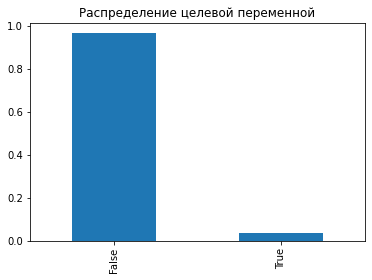

In [230]:
(dt_target.value_counts()/dt_target.shape[0]).plot(kind='bar', title='Распределение целевой переменной');
dt_target.value_counts()/dt_target.shape

In [232]:
from sklearn.model_selection import train_test_split

# Зафиксируем значение random_state для воспроизводимости результатов.
RANDOM_STATE = 333

train_idx, test_idx = train_test_split(dt_train_mrg.index, test_size=0.25, random_state=RANDOM_STATE)

y_train, y_test = dt_target.loc[train_idx], dt_target.loc[test_idx]
X_train, X_test = dt_train_mrg.loc[train_idx], dt_train_mrg.loc[test_idx]

print("Train")
print(dt_target.loc[train_idx].value_counts()/train_idx.shape[0])
print()
print("Test")
print(dt_target.loc[test_idx].value_counts()/test_idx.shape[0])

KeyError: '[1685, 1579, 798, 1996, 2565, 3492, 539, 1024, 309, 638, 2445, 1253, 1288, 2131, 3256, 1108, 2128, 3272, 1554, 1898, 52, 135, 1179, 513, 1548, 2790, 829, 724, 1045, 2498, 856, 310, 272, 181, 1216, 2305, 436, 753, 1080, 551, 2280, 1717, 1232, 837, 849, 741, 1083, 74, 1425, 3559, 3625, 2638, 1063, 3202, 2346, 2107, 3177, 900, 2429, 3243, 1267, 3025, 16, 3337, 1828, 601, 2089, 123, 1324, 1161, 1950, 2428, 2899, 1858, 1239, 1838, 2040, 852, 1662, 600, 3060, 1502, 1328, 1835, 3237, 572, 918, 449, 1854, 2027, 2849, 1682, 2226, 2285, 3352, 2984, 1102, 1689, 1364, 1147, 1254, 750, 1875, 227, 1032, 1732, 2127, 2896, 2532, 2954, 3105, 2061, 2904, 2683, 1480, 2353, 274, 2169, 2422, 1705, 3179, 2733, 2902, 3078, 2830, 3127, 1196, 2389, 3315, 474, 3610, 3287, 3428, 2860, 1273, 2252, 3069, 901, 2552, 542, 685, 3360, 114, 40, 1552, 2897, 811, 1307, 3634, 3571, 2828, 2103, 3115, 2239, 2657, 2491, 948, 3609, 3185, 3376, 1959, 469, 3469, 2145, 2319, 57, 440, 1655, 1625, 781, 2576, 3135, 684, 168, 1598, 2055, 346, 2264, 3706, 349, 3425, 2536, 1471, 1219, 859, 2506, 3118, 2800, 2725, 695, 2182, 2887, 2112, 717, 878, 2806, 2435, 1316, 1384, 1823, 372, 591, 1408, 2455, 2149, 972, 1152, 1046, 3228, 130, 1953, 1109, 787, 1807, 2056, 1646, 3156, 312, 3146, 3354, 511, 3628, 2228, 2014, 2583, 2002, 2967, 2556, 1053, 281, 3137, 744, 1883, 714, 1070, 129, 2034, 339, 1473, 1958, 1849, 368, 867, 131, 2270, 3553, 2991, 2777, 807, 3259, 2454, 792, 3112, 2813, 1312, 565, 85, 3351, 1651, 3031, 1231, 3362, 2625, 2263, 2793, 2978, 803, 2113, 1181, 2238, 2996, 145, 1760, 1479, 3244, 1641, 1079, 410, 3216, 2718, 1668, 2703, 2094, 819, 2955, 2335, 1904, 278, 2291, 976, 3611, 343, 1014, 1209, 1370, 2512, 3230, 2713, 3653, 3012, 2917, 249, 51, 262, 2388, 2408, 660, 2728, 3451, 445, 3277, 3373, 3377, 1128, 971, 1610, 2460, 2687, 289, 3192, 2020, 355, 426, 2549, 2990, 2041, 2050, 1107, 1954, 3280, 758, 593, 133, 1789, 1606, 1557, 3306, 2343, 773, 2746, 5, 1131, 2380, 3124, 490, 2321, 267, 2604, 3149, 1565, 1186, 988, 2168, 3566, 794, 923, 1581, 2473, 1426, 240, 1829, 375, 1989, 648, 2664, 2381, 1301, 3477, 1509, 253, 3221, 712, 2161, 1882, 3123, 2935, 1469, 2436, 1103, 1499, 1101, 706, 3114, 415, 3085, 2922, 3045, 2690, 898, 3602, 2903, 2162, 1350, 2993, 1753, 93, 3439, 1846, 623, 12, 1291, 200, 1199, 2774, 1447, 3052, 3349, 3294, 2908, 1438, 3437, 2812, 1241, 3594, 1283, 1537, 3021, 105, 2039, 1738, 640, 3702, 3369, 3071, 2068, 2279, 2754, 476, 1264, 2926, 1938, 841, 2874, 3660, 1708, 3584, 2558, 3276, 3329, 32, 3644, 430, 1772, 2835, 1331, 457, 930, 3070, 1448, 3700, 1843, 3265, 3130, 3647, 463, 1558, 3116, 2671, 1357, 737, 2516, 2939, 3095, 103, 2721, 2477, 1680, 500, 3401, 3020, 2287, 1887, 1778, 2151, 183, 237, 895, 916, 1659, 2770, 2857, 3661, 2357, 746, 1221, 328, 296, 1346, 796, 1965, 1171, 713, 3046, 723, 1840, 1808, 206, 1974, 920, 169, 1619, 3548, 1419, 3630, 3282, 471, 2548, 311, 1728, 2467, 2539, 3236, 2420, 2157, 3150, 298, 3583, 2839, 1533, 1498, 2649, 720, 1008, 1249, 3655, 1573, 1631, 1905, 540, 2452, 824, 210, 3650, 2755, 2501, 599, 1375, 2741, 2489, 3580, 2654, 981, 2087, 1027, 2916, 587, 1318, 3200, 3113, 1146, 2480, 1827, 3556, 188, 3476, 1359, 1421, 3303, 2906, 3544, 2093, 167, 2407, 1373, 1586, 1282, 1000, 754, 3332, 2230, 1431, 337, 1638, 108, 2704, 619, 64, 3687, 935, 256, 1635, 757, 559, 2032, 1942, 374, 818, 830, 450, 1303, 1866, 1402, 2832, 28, 1945, 3618, 3062, 3436, 2912, 2393, 940, 2910, 223, 2555, 109, 3007, 1297, 3595, 1238, 1059, 2540, 2125, 3129, 2391, 2212, 132, 2468, 3358, 2086, 2487, 220, 1559, 1117, 2167, 3160, 3275, 834, 3654, 2550, 3198, 965, 1583, 164, 199, 2667, 2787, 547, 3554, 3627, 2610, 3364, 1891, 2678, 1302, 671, 359, 647, 2474, 2674, 3550, 615, 2215, 2588, 2525, 1423, 134, 1929, 2631, 1336, 1845, 2271, 36, 1262, 2258, 366, 1374, 1355, 585, 3262, 1005, 1658, 913, 1687, 3406, 864, 869, 2352, 421, 1814, 330, 2390, 764, 1602, 3446, 1780, 1931, 3173, 2442, 2326, 730, 3649, 1028, 3704, 2006, 1884, 2208, 76, 2615, 1339, 1768, 2080, 2795, 1661, 1535, 909, 2481, 3108, 1112, 1934, 3103, 2130, 3383, 628, 2141, 3633, 2781, 3110, 881, 1230, 1617, 1504, 3338, 9, 831, 2526, 905, 491, 595, 3679, 3658, 3693, 1894, 1466, 2964, 1879, 3456, 1428, 400, 117, 3529, 1949, 612, 816, 808, 1338, 3197, 2, 2822, 1541, 933, 1538, 3523, 2988, 1492, 1690, 2626, 1284, 2198, 962, 38, 642, 3698, 917, 2251, 2266, 790, 1618, 395, 3359, 2250, 1679, 2923, 2398, 1463, 3032, 3558, 182, 3466, 1185, 1452, 260, 3641, 562, 3629, 1311, 1275, 2762, 843, 201, 380, 1871, 3382, 2784, 871, 2225, 682, 2108, 1582, 2607, 3047, 1403, 2114, 3585, 3002, 192, 2175, 88, 2731, 1987, 1334, 2818, 1928, 3589, 2312, 3480, 2347, 352, 1440, 271, 1368, 2281, 844, 2129, 999, 2652, 2324, 2038, 1214, 2865, 2203, 1488, 2522, 1957, 1851, 950, 1206, 957, 1629, 2693, 1198, 420, 673, 1593, 1514, 1649, 3089, 2854, 1295, 3326, 1213, 1839, 2181, 2269, 3562, 1259, 2608, 332, 662, 1327, 1091, 2665, 465, 3328, 2062, 1489, 2025, 1130, 1389, 644, 1576, 1550, 1371, 2972, 1847, 3317, 2431, 2807, 2360, 3342, 606, 60, 2504, 1790, 3365, 3400, 3440, 1296, 1653, 1926, 2768, 479, 2976, 2696, 2375, 2404, 2571, 3547, 2126, 637, 2869, 3665, 2969, 3389, 1205, 3413, 700, 1673, 815, 1015, 1481, 1713, 2931, 652, 2244, 2307, 1741, 2206, 1981, 10, 3180, 1417, 1333, 1255, 1380, 2852, 1002, 3664, 96, 2575, 2303, 3099, 1416, 1940, 3318, 1177, 978, 2803, 954, 3293, 232, 3533, 654, 397, 877, 809, 2544, 3520, 2714, 2054, 3309, 955, 3501, 2449, 1532, 3242, 3371, 2309, 1227, 2889, 193, 3086, 3465, 3097, 3487, 558, 305, 3513, 1157, 3011, 2659, 2946, 1763, 3016, 858, 1712, 1459, 451, 1436, 1654, 665, 3274, 707, 846, 258, 3486, 1294, 1226, 549, 2975, 991, 3172, 2051, 4, 2578, 1771, 890, 2037, 3094, 266, 3157, 1308, 1088, 1018, 1281, 1984, 341, 3640, 2551, 3386, 2121, 1664, 791, 3677, 3534, 3073, 204, 2737, 136, 801, 3321, 1029, 2794, 1490, 3208, 747, 1507, 3387, 1056, 3475, 154, 1826, 974, 7, 427, 1326, 1225, 1796, 1482, 1501, 3549, 1556, 2118, 903, 2582, 1300, 2361, 2224, 2013, 370, 3194, 3453, 2222, 3169, 531, 982, 1520, 1941, 3223, 2995, 2592, 534, 3072, 37, 3080, 506, 726, 2983, 1933, 2001, 3423, 1182, 689, 1783, 3460, 1183, 3684, 2778, 1539, 1939, 1516, 1180, 1963, 2892, 2372, 3027, 2240, 2196, 696, 1126, 1562, 2155, 2283, 561, 3159, 1767, 2560, 952, 1907, 3288, 2022, 2058, 626, 1856, 3183, 1748, 468, 1691, 2893, 499, 2689, 2044, 3366, 498, 2802, 1168, 1234, 3141, 1906, 512, 2219, 3001, 3421, 455, 1588, 2743, 1476, 2495, 1127, 2016, 2508, 1735, 3252, 1200, 2043, 2597, 2334, 3333, 2293, 2791, 3240, 1422, 2919, 358, 2465, 1747, 2879, 1242, 2724, 1269, 1623, 1517, 3551, 1797, 2367, 209, 1616, 1412, 2885, 2587, 444, 1688, 196, 1141, 1633, 697, 2859, 3153, 594, 3320, 528, 896, 2218, 315, 2297, 822, 198, 990, 3493, 3084, 2030, 3350, 661, 656, 1982, 1189, 2197, 1961, 1793, 1257, 1397, 839, 1700, 2180, 2833, 261, 2898, 828, 2927, 2209, 3107, 1575, 825, 3145, 1833, 1192, 3186, 21, 2759, 3148, 979, 3574, 1812, 3552, 2160, 3167, 3015, 244, 1358, 323, 938, 3344, 1703, 3229, 2139, 1094, 2909, 668, 1511, 3404, 842, 3397, 1524, 3596, 195, 2589, 27, 2853, 3049, 3591, 2944, 2668, 2116, 1647, 3433, 529, 3474, 2351, 66, 3573, 2368, 1218, 934, 2095, 3415, 703, 1100, 2862, 574, 882, 3067, 3346, 694, 1468, 510, 2827, 3530, 2726, 1956, 2236, 287, 2413, 1274, 2965, 1266, 1026, 1089, 1111, 100, 3666, 2053, 1733, 2590, 2692, 84, 390, 522, 2432, 1528, 326, 1084, 177, 2028, 1382, 1006, 1013, 2012, 3560, 475, 2134, 140, 2492, 2427, 3341, 1916, 2706, 2761, 721, 3225, 2511, 2546, 2386, 414, 2780, 719, 692, 861, 2981, 1188, 2740, 336, 520, 3683, 2758, 568, 1042, 1915, 1114, 866, 2530, 1745, 228, 207, 1429, 1777, 1722, 2124, 1405, 3615, 907, 2475, 1081, 2637, 3283, 1707, 25, 2010, 65, 1644, 2732, 1951, 2647, 1475, 3343, 1785, 79, 1497, 2042, 1626, 3004, 62, 970, 2840, 3019, 2817, 3509, 518, 3319, 3226, 42, 2959, 347, 104, 2502, 1142, 2684, 2873, 19, 1483, 2963, 2947, 3355, 3029, 1330, 2082, 2632, 1160, 2459, 1706, 2681, 1149, 1716, 517, 2971, 3266, 484, 2629, 711, 385, 3443, 3076, 2186, 404, 805, 3120, 283, 1246, 1935, 3131, 2296, 1909, 3227, 687, 2300, 2930, 2255, 1991, 3586, 1037, 215, 461, 1158, 1457, 749, 3431, 276, 217, 827, 2941, 786, 555, 740, 3411, 13, 2021, 1640, 1913, 1736, 1441, 2376, 2246, 470, 1285, 2979, 1614, 1110, 3106, 351, 1872, 2098, 1456, 3426, 3258, 3607, 589, 608, 2593, 2071, 495, 1746, 1869, 2563, 3134, 774, 1968, 838, 24, 2881, 850, 3345, 664, 3478, 2430, 2165, 3170, 865, 2340, 2284, 1620, 1393, 3096, 2330, 3009, 1937, 1813, 3193, 3182, 2785, 2801, 3140, 1458, 322, 610, 567, 344, 3545, 94, 1710, 2325, 1208, 1723, 3638, 501, 247, 667, 89, 2423, 1817, 2096, 1972, 428, 146, 1352, 3606, 1665, 1341, 389, 2350, 3464, 407, 2015, 3119, 894, 3427, 255, 203, 222, 912, 1523, 50, 155, 964, 1809, 3064, 1546, 2838, 883, 2727, 688, 3241, 399, 3405, 371, 3121, 3246, 1757, 1240, 3260, 657, 3083, 2072, 2470, 2686, 845, 3578, 1044, 2974, 429, 1615, 3643, 1781, 2453, 8, 477, 447, 2171, 1853, 406, 1329, 3422, 709, 2152, 1461, 1381, 1506, 3014, 3003, 876, 3081, 3253, 1704, 17, 3298, 1010, 279, 2485, 2871, 245, 2378, 482, 1325, 779, 3217, 847, 641, 997, 1670, 2630, 3576, 1765, 3512, 1566, 533, 3689, 2004, 1540, 3680, 431, 802, 1724, 2249, 1021, 2202, 1315, 29, 1009, 718, 2100, 3652, 1033, 2231, 3313, 2836, 3517, 1390, 886, 752, 1420, 31, 34, 3063, 173, 205, 408, 282, 3669, 1978, 3152, 2339, 1052, 3, 3036, 418, 152, 731, 3391, 2158, 2542, 3582, 364, 1594, 2595, 2358, 3264, 26, 423, 1888, 1555, 1235, 112, 3403, 1786, 765, 3231, 3675, 3296, 259, 1930, 924, 3577, 1299, 2144, 537, 776, 734, 377, 2998, 2905, 2268, 2184, 2348, 1818, 3546, 2070, 3171, 3528, 3187, 2063, 2765, 1039, 1962, 525, 2531, 3659, 251, 2401, 1290, 655, 158, 1788, 3682, 1159, 800, 3626, 2248, 453, 422, 1057, 2797, 892, 1737, 33, 622, 2328, 1536, 951, 2235, 2938, 2304, 1377, 299, 1794, 2362, 1165, 2503, 1485, 2136, 1462, 1016, 1549, 2745, 945, 157, 2081, 1298, 1138, 1487, 2289, 2519, 3701, 2229, 2751, 1699, 2585, 277, 478, 2719, 212, 170, 1263, 2365, 3590, 624, 3575, 2808, 1584, 75, 686, 3688, 56, 2738, 949, 1078, 2537, 306, 690, 784, 804, 3496, 2241, 1055, 3219, 2888, 2150, 1401, 1890, 2088, 2135, 486, 1870, 2396, 2875, 3068, 2097, 2438, 3316, 2301, 1280, 202, 1997, 3322, 1491, 324, 3101, 578, 502, 681, 2316, 812, 939, 2616, 2440, 516, 1862, 3348, 1388, 678, 2456, 1445, 1995, 3639, 1917, 2344, 67, 348, 586, 3178, 2411, 2444, 1356, 1613, 2275, 301, 2823, 1164, 125, 775, 566, 2943, 3102, 1985, 2223, 1178, 2009, 1069, 1309, 2618, 3432, 1250, 2609, 1863, 14, 666, 2868, 604, 1977, 1271, 350, 2311, 3040, 2201, 2260, 254, 3176, 2031, 2341, 2518, 975, 653, 494, 3090, 1224, 1936, 987, 186, 3268, 2387, 160, 2447, 3452, 2675, 2640, 3441, 3489, 2786, 2911, 2138, 545, 1622, 82, 953, 1734, 1952, 3088, 2601, 1439, 755, 611, 1914, 1621, 381, 2723, 2962, 1667, 2317, 1038, 1486, 3028, 3567, 526, 535, 2520, 3087, 2315, 1435, 3485, 983, 2924, 919, 989, 1561, 2262, 1098, 2771, 1342, 3327, 2288, 3339, 2843, 2073, 211, 3619, 1223, 2691, 1379, 1756, 1051, 1740, 3261, 3579, 1424, 1470, 2688, 3367, 3136, 943, 1256, 3696, 2018, 785, 3447, 2446, 1143, 2298, 579, 1118, 3537, 2418, 3347, 1153, 552, 3249, 3374, 1636, 2627, 1775, 967, 879, 985, 2109, 1414, 3281, 1116, 1834, 1889, 969, 3503, 1800, 172, 365, 3636, 977, 58, 3037, 1395, 1739, 3396, 2078, 2079, 3429, 3292, 2870, 2577, 373, 91, 2524, 1946, 2276, 1119, 353, 2354, 2448, 99, 603, 2757, 3450, 231, 2011, 1611, 3681, 3310, 2710, 1233, 161, 304, 2894, 2214, 466, 1236, 3457, 2409, 1637, 2772, 264, 2645, 1085, 2342, 219, 3593, 2450, 1387, 1878, 2701, 3196, 1656, 1464, 2553, 738, 3599, 2019, 2779, 3668, 1859, 3209, 3245, 473, 1686, 213, 1237, 1353, 2414, 1082, 2486, 3535, 2829, 733, 1677, 1465, 1587, 2092, 1886, 2159, 2484, 369, 2679, 1810, 3117, 2809, 1787, 2000, 2796, 1197, 185, 1446, 2147, 860, 675, 388, 2700, 1666, 932, 3026, 2254, 3058, 2189, 3023, 1123, 1609, 2007, 2472, 821, 2940, 1169, 1660, 3635, 1754, 613, 3472, 128, 3267, 121, 1348, 1526, 2523, 820, 1988, 880, 3061, 1467, 2425, 90, 333, 3361, 2500, 3314, 2123, 3515, 1106, 2059, 3592, 2374, 3248, 519, 1922, 1190, 2385, 1076, 1058, 1495, 2265, 2274, 2999, 2611, 3468, 20, 2848, 3483, 1095, 3234, 3122, 3565, 679, 3257, 1054, 3254, 2046, 3166, 904, 54, 488, 2220, 553, 3335, 1943, 1774, 297, 1449, 742, 1624, 3214, 835, 2091, 3417, 1545, 639, 1932, 2406, 2744, 3691, 221, 3657, 2332, 2705, 772, 766, 2153, 3075, 1844, 769, 2049, 3054, 3540, 3285, 1245, 1460, 2443, 2760, 1478, 342, 456, 425, 45, 1343, 402, 1595, 2090, 1910, 3445, 2177, 806, 396, 2132, 434, 2204, 3331, 3500, 2660, 2858, 1592, 2359, 2564, 1897, 3263, 487, 643, 1201, 1321, 3289, 291, 3363, 853, 631, 3379, 218, 3133, 3055, 3678, 2234, 575, 3163, 412, 1564, 2140, 1400, 3645, 1719, 2951, 2488, 893, 2338, 914, 3402, 0, 1799, 3311, 1279, 1121, 3532, 670, 625, 2164, 2545, 3663, 2257, 1278, 3184, 159, 627, 3074, 3455, 3510, 3006, 2047, 250, 1292, 1407, 1477, 2788, 270, 1678, 609, 1522, 617, 2227, 2850, 2207, 2499, 1360, 705, 2142, 658, 2148, 163, 3291, 2856, 1176, 1759, 2085, 2178, 2749, 393, 2133, 2698, 634, 3462, 2384, 1137, 736, 2397, 3563, 778, 1773, 2035, 2290, 2594, 1628, 459, 3430, 651, 1252, 768, 1567, 1455, 1801, 3616, 2433, 424, 1608, 230, 2624, 1193, 1544, 1418, 891, 2515, 1663, 823, 3378, 3672, 1392, 2509, 1850, 275, 2921, 2543, 2866, 1600, 1442, 361, 2712, 3203, 2811, 2949, 1578, 2507, 284, 197, 2392, 472, 1450, 3220, 321, 1650, 1570, 2697, 1003, 2273, 581, 2617, 3307, 2069, 3109, 2845, 1821, 3111, 1202, 1139, 2036, 3442, 2851, 3098, 178, 3375, 674, 592, 2891, 789, 437, 2559, 3605, 3301, 1805, 2628, 3690, 3368, 1122, 2439, 3269, 2561, 1643, 1634, 854, 722, 3222, 2195, 3312, 3380, 1529, 1244, 621, 1047, 3213, 1877, 6, 2742, 3057, 1061, 3508, 597, 3467, 926, 2567, 452, 286, 2663, 1145, 1896, 569, 2764, 929, 3623, 1547, 2847, 2461, 2605, 2111, 505, 2677, 1276, 1134, 2187, 2934, 2666, 2017, 3631, 229, 1976, 3092, 2747, 2682, 618, 1347, 2527, 635, 1560, 18, 1074, 2122, 1073, 3444, 1071, 363, 1124, 3646, 2655, 1750, 693, 925, 1394, 394, 1994, 2179, 538, 944, 179, 1048, 1676, 1975, 2750, 2356, 1385, 1924, 3394, 122, 2437, 106, 3470, 2855, 1591, 2932, 95, 3299, 115, 1861, 3518, 401, 1553, 462, 119, 53, 2216, 214, 735, 580, 1795, 1758, 3393, 3673, 2952, 78, 2945, 2810, 2471, 2415, 1607, 1731, 922, 1893, 2029, 3174, 2320, 1512, 1525, 3617, 1434, 2863, 1580, 3372, 2948, 2210, 1802, 3388, 2739, 1543, 1899, 2003, 3211, 1133, 956, 1744, 257, 460, 2221, 1841, 2286, 2612, 3126, 1404, 767, 2395, 409, 2644, 980, 1912, 2826, 2172, 1090, 1701, 1920, 59, 3125, 1639, 3695, 797, 3507, 645, 2008, 3168, 1599, 1258, 1695, 269, 1217, 543, 263, 2882, 3624, 1711, 1776, 1361, 2327, 1911, 3035, 2083, 2970, 3707, 435, 441, 669, 2579, 2643, 602, 3143, 3144, 584, 293, 636, 1645, 1151, 151, 2953, 1086, 116, 1306, 2614, 1500, 3479, 2119, 285, 3539, 3516, 46, 1398, 3438, 1971, 1443, 973, 1804] not in index'

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]

In [77]:
dt_train.columns

Index(['id', 'vas_id', 'buy_time', 'week'], dtype='object')

In [ ]:
bl_estimator = Pipeline([
    ('log_reg', LogisticRegression(random_state=RANDOM_STATE, n_jobs=-1)),
])


In [70]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

kfold_cv = KFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

def run_cv(estimator, cv, X, y, scoring='roc_auc', model_name=""):
    cv_res = cross_validate(estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1)    
    print(f"{model_name}: {scoring} = {cv_res['test_score'].mean():0.4f} (+/- {cv_res['test_score'].std()*2:0.4f})")


In [71]:
run_cv(bl_estimator, kfold_cv, X_train, y_train, scoring='recall', model_name="Baseline");

Baseline: recall = 0.0000 (+/- 0.0000)


In [72]:
run_cv(bl_estimator, kfold_cv, X_train, y_train, scoring='accuracy', model_name="Baseline");

Baseline: accuracy = 0.9627 (+/- 0.0032)


In [73]:
run_cv(bl_estimator, kfold_cv, X_train, y_train, scoring='precision', model_name="Baseline");

Baseline: precision = 0.0000 (+/- 0.0000)


In [74]:
run_cv(bl_estimator, kfold_cv, X_train, y_train, model_name="Baseline");

Baseline: roc_auc = 0.5564 (+/- 0.0256)


In [76]:
bl_estimator.fit(X_train, y_train)

bl_y_pred = bl_estimator.predict_proba(X_test)[:,1]
bl_y_pred

array([0.03020714, 0.037061  , 0.0428751 , ..., 0.04761225, 0.03412395,
       0.04683266])

/home/svm/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/svm/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/svm/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/svm/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Pr